<a href="https://colab.research.google.com/github/JaperTai77/Colab-notebook/blob/main/disease_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Data Analyze

## Import data and package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, explained_variance_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2
from sklearn.metrics import classification_report

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [4]:
url = 'https://raw.githubusercontent.com/JaperTai77/data-modified/main/heart.csv'
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data exploration

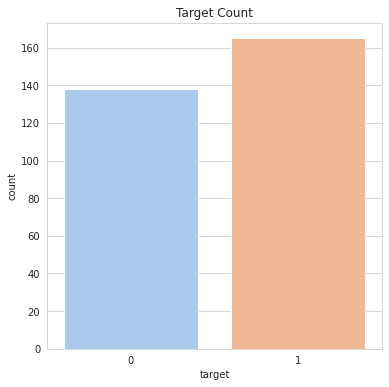

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize = (6,6))
sns.countplot(x = 'target', data = df, palette= 'pastel').set_title('Target Count')
plt.show()

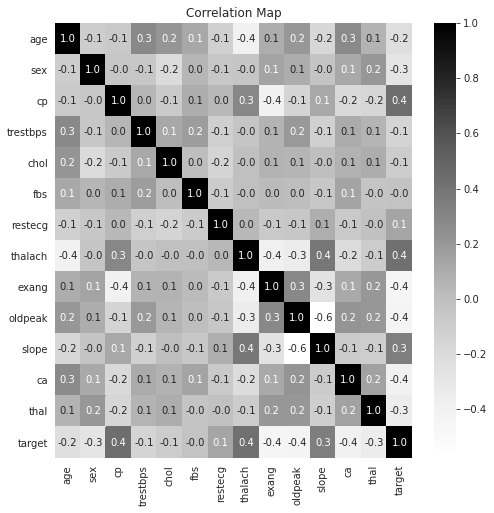

In [8]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), cmap = 'Greys',annot= True, fmt = '.1f').set_title('Correlation Map')
plt.show()

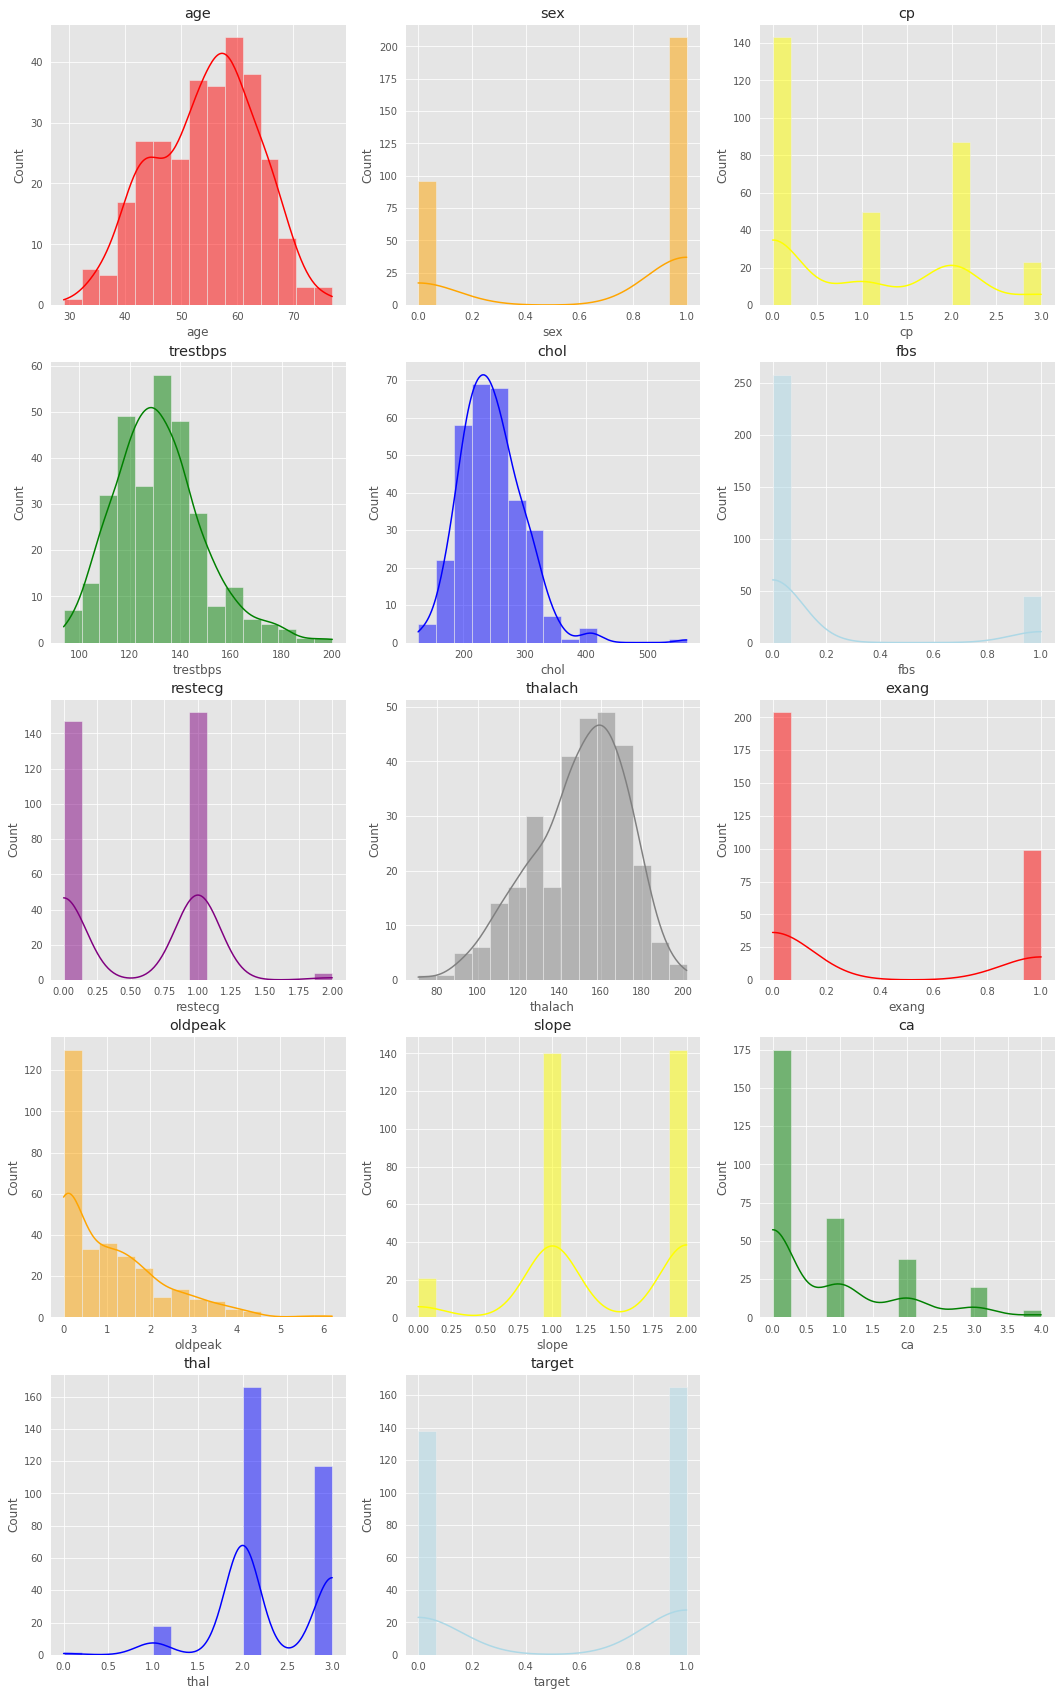

In [9]:
def pplot(df,a,b,col_namnes,c = 0):
    color = ['red','orange','yellow','green','blue','lightblue','purple','gray','red','orange','yellow','green','blue','lightblue','purple','gray','red','orange','yellow','green','blue','lightblue','purple','gray']
    int_col = df.select_dtypes(['int','float']).columns
    l = range(len(df.columns))
    col = df.columns
    i = 0
    plt.style.use('ggplot')
    plt.figure(figsize = (b*6,a*6))
    for i in l:
        if col[i] in int_col:
            plt.subplot(a,b,i+1)
            sns.histplot(df[col[i]],kde = True, legend = True, color = color[i],bins = 15).set_title(col_namnes[i+c])
            i = i+1
        else:
            plt.subplot(a,b,i+1)
            sns.countplot(df[col[i]],color = color[i]).set_title(col[i])
            i = i+1
    plt.show()  
pplot(df,col_namnes = df.columns,a = 5,b = 3)

In [10]:
df.iloc[85,:]

age          67.0
sex           0.0
cp            2.0
trestbps    115.0
chol        564.0
fbs           0.0
restecg       0.0
thalach     160.0
exang         0.0
oldpeak       1.6
slope         1.0
ca            0.0
thal          3.0
target        1.0
Name: 85, dtype: float64

In [11]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


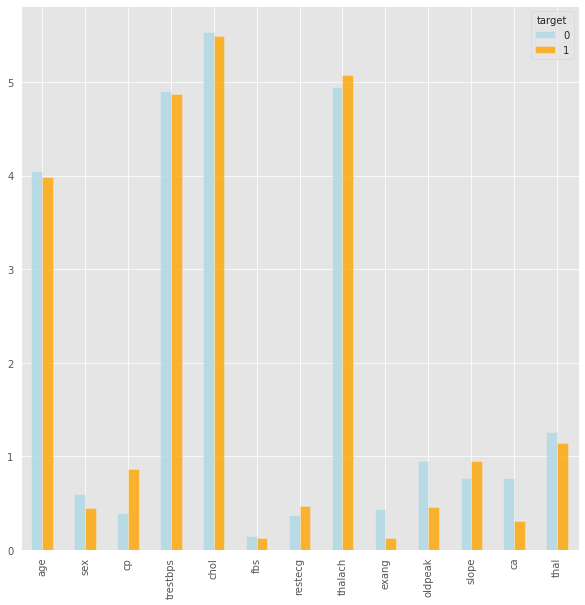

In [12]:
np.log(df.groupby('target').mean()+1).T.plot(kind = 'bar',figsize = (10,10),color = ['lightblue','orange'],grid = True,alpha = 0.8)

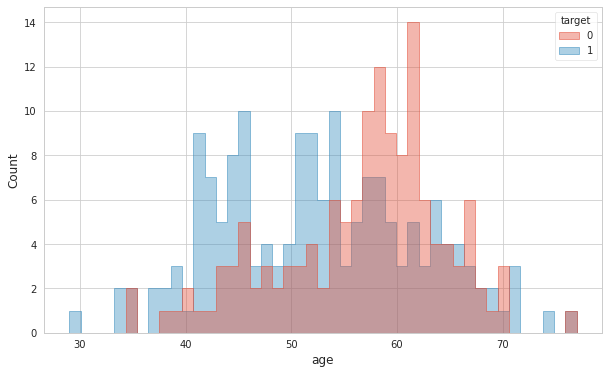

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.histplot(x = 'age', data = df, hue = 'target',alpha = 0.4, bins = 45,element="step", color = ['lightblue','orange'])
plt.show()

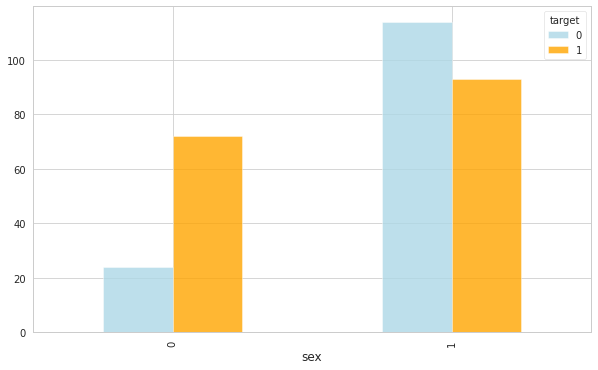

In [14]:
pd.crosstab(df.sex,df.target).plot(kind="bar",color = ['lightblue','orange'],figsize = (10,6),grid = True,alpha = 0.8)

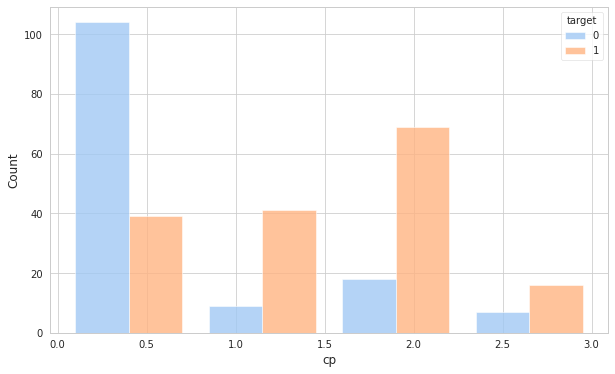

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.histplot(x = 'cp', data = df, hue = 'target',alpha = 0.8, bins = 4,multiple="dodge",shrink=.8, palette='pastel')
plt.show()

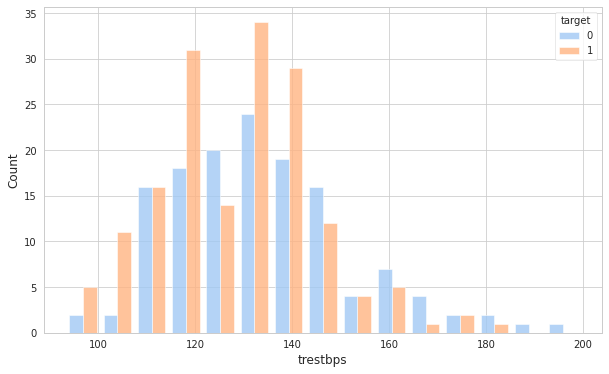

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.histplot(x = 'trestbps', data = df, hue = 'target',alpha = 0.8, bins = 15,multiple="dodge",shrink=.8, palette='pastel')
plt.show()

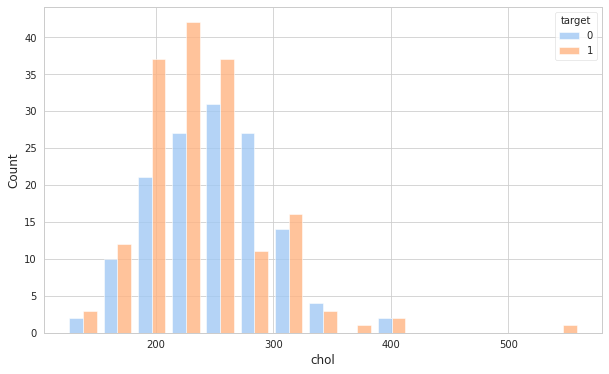

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.histplot(x = 'chol', data = df, hue = 'target',alpha = 0.8, bins = 15,multiple="dodge",shrink=.8, palette='pastel')
plt.show()

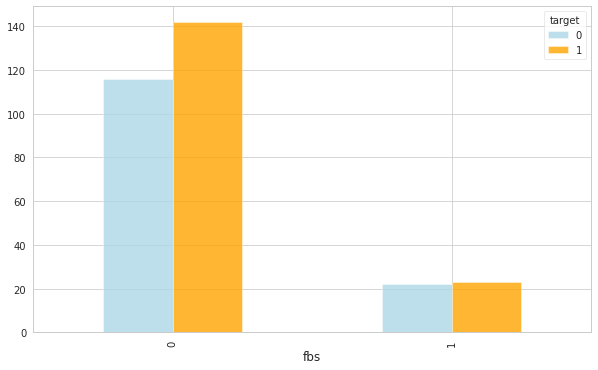

In [18]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",color = ['lightblue','orange'],figsize = (10,6),grid = True,alpha = 0.8)

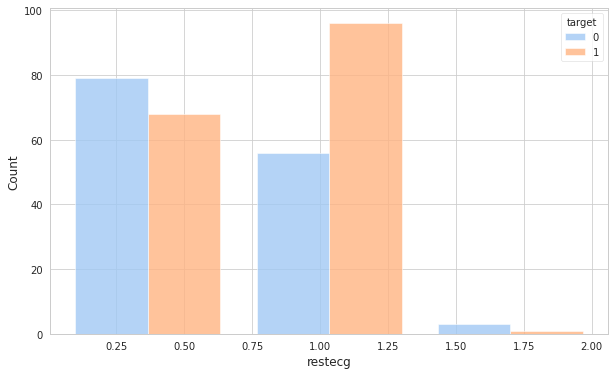

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.histplot(x = 'restecg', data = df, hue = 'target',alpha = 0.8, bins = 3,multiple="dodge",shrink=.8, palette='pastel')
plt.show()

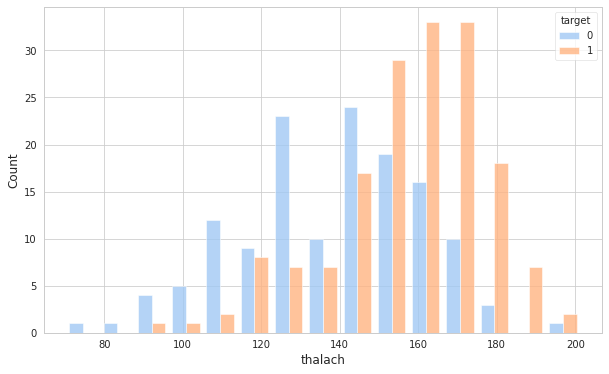

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.histplot(x = 'thalach', data = df, hue = 'target',alpha = 0.8, bins = 15,multiple="dodge",shrink=.8, palette='pastel')
plt.show()

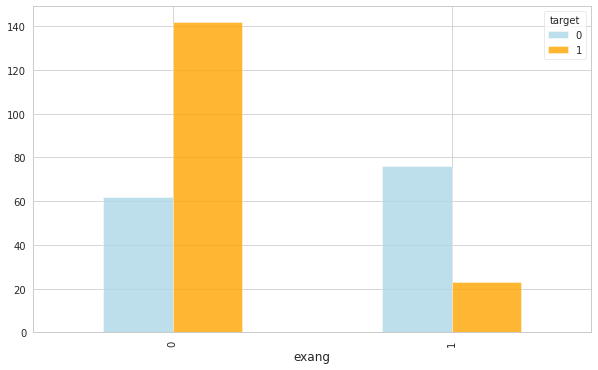

In [21]:
pd.crosstab(df.exang,df.target).plot(kind="bar",color = ['lightblue','orange'],figsize = (10,6),grid = True,alpha = 0.8)

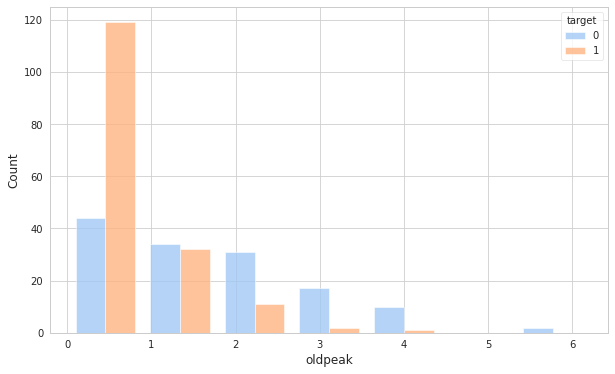

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.histplot(x = 'oldpeak', data = df, hue = 'target',alpha = 0.8, bins = 7,multiple="dodge",shrink=.8, palette='pastel')
plt.show()

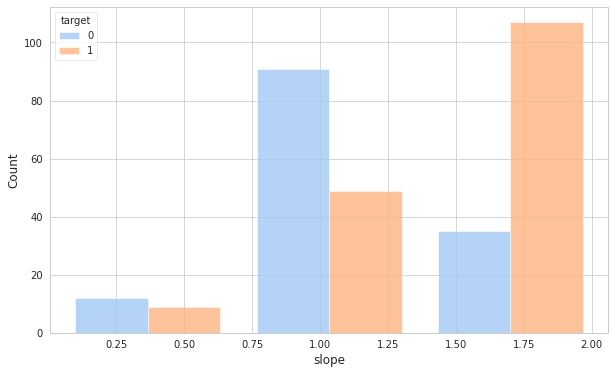

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.histplot(x = 'slope', data = df, hue = 'target',alpha = 0.8, bins = 3,multiple="dodge",shrink=.8, palette='pastel')
plt.show()

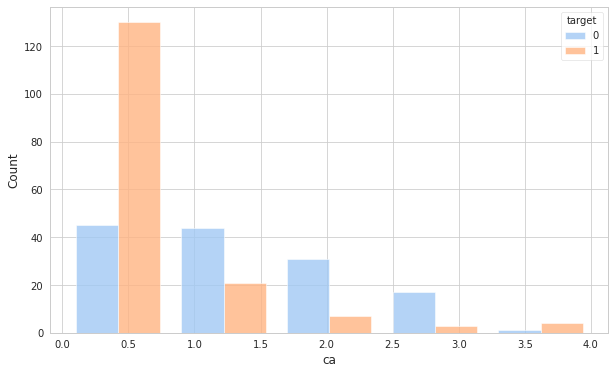

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.histplot(x = 'ca', data = df, hue = 'target',alpha = 0.8, bins = 5,multiple="dodge",shrink=.8, palette='pastel')
plt.show()

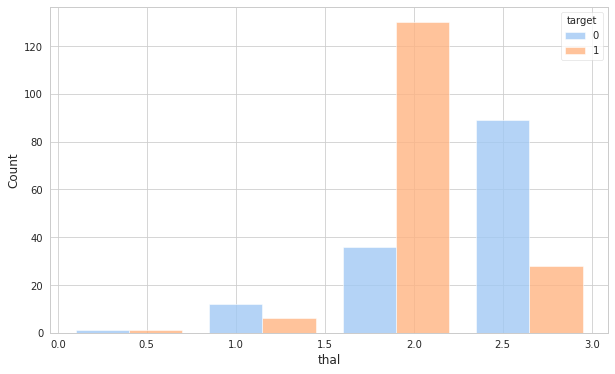

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.histplot(x = 'thal', data = df, hue = 'target',alpha = 0.8, bins = 4,multiple="dodge",shrink=.8, palette='pastel')
plt.show()

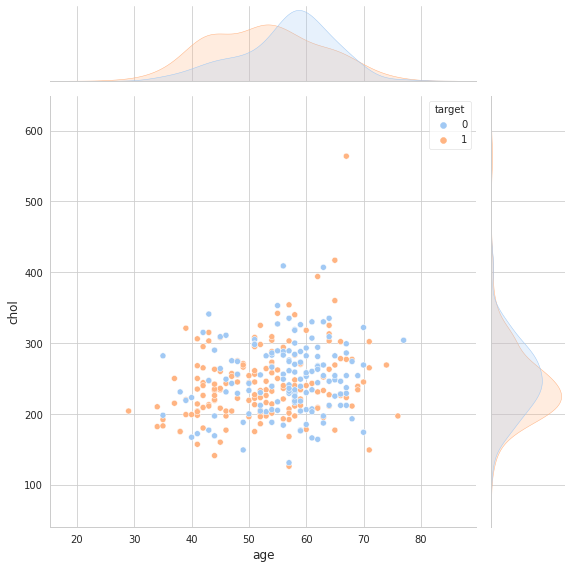

In [26]:
sns.set_style('whitegrid')
sns.jointplot(x = 'age', y = 'chol', data = df, hue = 'target',palette='pastel',height=8)
plt.show()

## Dummy variable

In [28]:
cp = pd.get_dummies(df.cp,prefix='cp')
thal = pd.get_dummies(df.thal,prefix='thal')
slope = pd.get_dummies(df.slope,prefix='slope')
df = pd.concat([df,cp,thal,slope],axis = 1).drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


In [29]:
X = df.drop(columns= 'target')
y = df.target
X_columns = df.drop(columns= 'target').columns

## View Outliers

In [30]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X_prime = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.74757147, 0.15038095])

<Figure size 720x720 with 0 Axes>

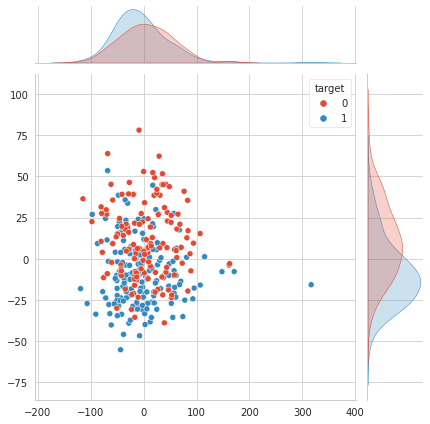

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.jointplot(x = X_prime[:,0], y = X_prime[:,1],hue = y)
plt.show()

In [32]:
for i in range(0,300):
  if X_prime[i,0]>300:
    print(i)
    break

85


## Classification

### Logistic regression

#### Determine whether variables are significant

In [33]:
for i,c in enumerate (X_columns):
  print('x'+str(i+1),c)

x1 age
x2 sex
x3 trestbps
x4 chol
x5 fbs
x6 restecg
x7 thalach
x8 exang
x9 oldpeak
x10 ca
x11 cp_0
x12 cp_1
x13 cp_2
x14 cp_3
x15 thal_0
x16 thal_1
x17 thal_2
x18 thal_3
x19 slope_0
x20 slope_1
x21 slope_2


In [34]:
x2 = sm.add_constant(np.array(X))
y2 = np.array(y)
result = sm.GLM(y2, x2,family = sm.families.Binomial()).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  303
Model:                            GLM   Df Residuals:                      284
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -101.05
Date:                Fri, 02 Apr 2021   Deviance:                       202.11
Time:                        05:44:52   Pearson chi2:                     294.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7645      1.445      1.221      0.2

#### Remove insignificant variables and scale data

In [35]:
from sklearn.model_selection import train_test_split
Xt = X.iloc[:,[1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
Xtrain, Xtest, ytrain, ytest = train_test_split(Xt,y,test_size = 0.20) # use Xtest ytest for evaluation

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

Xtraintemp, Xtrain_1, ytraintemp, ytrain_1 = train_test_split(Xtrain,ytrain,test_size = 0.25) # use Xtrain_1 ytrain_1
Xtraintemp, Xtrain_2, ytraintemp, ytrain_2 = train_test_split(Xtraintemp,ytraintemp,test_size = 0.33) # use Xtrain_2 ytrain_2
Xtrain_4, Xtrain_3, ytrain_4, ytrain_3 = train_test_split(Xtraintemp,ytraintemp,test_size = 0.5) # use Xtrain_3 ytrain_3 Xtrain_4 ytrain_4

#### Cross validation

In [36]:
def cross_val(xtest = Xtrain_4, xtrain = [Xtrain_1,Xtrain_2,Xtrain_3], ytest = ytrain_4, ytrain = [ytrain_1,ytrain_2,ytrain_3]):
  Xtemp = np.concatenate(xtrain)
  ytemp = np.concatenate(ytrain)
  from sklearn.linear_model import LogisticRegression
  lr = LogisticRegression()
  lr.fit(Xtemp,ytemp)
  y_pred_proba = lr.predict_proba(xtest)
  y_pred = lr.predict(xtest)
  
  from sklearn.metrics import roc_curve, auc, roc_auc_score
  fpr, tpr, ths = roc_curve(ytest, y_pred_proba[:,1])
  auc_score = auc(fpr,tpr)
  plt.plot(fpr,tpr,label="AUC Score:" + str(auc_score))
  plt.xlabel('fpr',fontsize='15')
  plt.ylabel('tpr',fontsize='15')
  plt.legend(loc='best')

  return accuracy_score(ytest,y_pred)

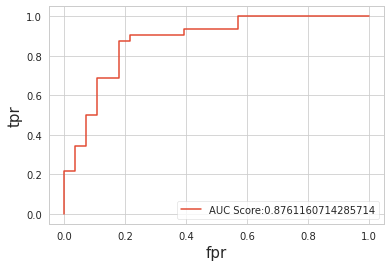

In [37]:
score = [cross_val()]

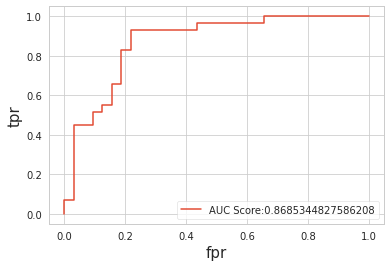

In [38]:
a = cross_val(xtest = Xtrain_3, xtrain = [Xtrain_1,Xtrain_2,Xtrain_4], ytest = ytrain_3, ytrain = [ytrain_1,ytrain_2,ytrain_4])
score.append(float(a))

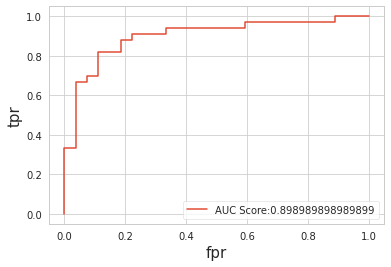

In [39]:
a = cross_val(xtest = Xtrain_2, xtrain = [Xtrain_1,Xtrain_3,Xtrain_4], ytest = ytrain_2, ytrain = [ytrain_1,ytrain_3,ytrain_4])
score.append(float(a))

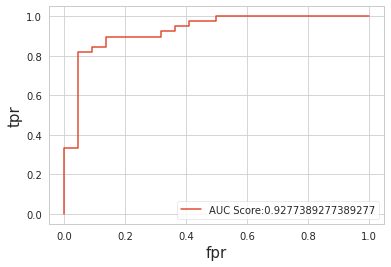

In [40]:
a = cross_val(xtest = Xtrain_1, xtrain = [Xtrain_2,Xtrain_3,Xtrain_4], ytest = ytrain_1, ytrain = [ytrain_2,ytrain_3,ytrain_4])
score.append(float(a))

In [41]:
print(np.mean(score))
score

0.842964480874317


[0.8333333333333334, 0.8360655737704918, 0.85, 0.8524590163934426]

#### Evaluate in the test model

0.8688524590163934

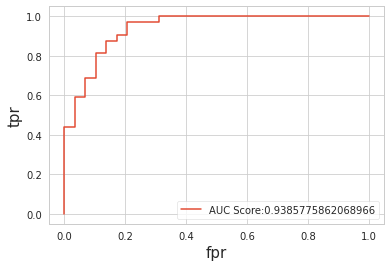

In [42]:
cross_val(xtest = Xtest, xtrain = [Xtrain_1,Xtrain_2,Xtrain_3,Xtrain_4], ytest = ytest, ytrain = [ytrain_1,ytrain_2,ytrain_3,ytrain_4])

In [43]:
Xtemp = np.concatenate([Xtrain_1,Xtrain_2,Xtrain_3,Xtrain_4])
ytemp = np.concatenate([ytrain_1,ytrain_2,ytrain_3,ytrain_4])
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtemp,ytemp)
y_pred = lr.predict(Xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [44]:
log_con = confusion_matrix(ytest,y_pred)

### Split data

In [45]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.20) # use Xtest ytest for evaluation

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

Xtraintemp, Xtrain_1, ytraintemp, ytrain_1 = train_test_split(Xtrain,ytrain,test_size = 0.25) # use Xtrain_1 ytrain_1
Xtraintemp, Xtrain_2, ytraintemp, ytrain_2 = train_test_split(Xtraintemp,ytraintemp,test_size = 0.33) # use Xtrain_2 ytrain_2
Xtrain_4, Xtrain_3, ytrain_4, ytrain_3 = train_test_split(Xtraintemp,ytraintemp,test_size = 0.5) # use Xtrain_3 ytrain_3 Xtrain_4 ytrain_4

### KNN

#### Find K

In [46]:
from sklearn.neighbors import KNeighborsClassifier

def cross_val(xtest = Xtrain_4, xtrain = [Xtrain_1,Xtrain_2,Xtrain_3], ytest = ytrain_4, ytrain = [ytrain_1,ytrain_2,ytrain_3]):
  Xtemp = np.concatenate(xtrain)
  ytemp = np.concatenate(ytrain)

  scoreList = []
  for i in range(2,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(Xtemp, ytemp)
    y_pred = knn.predict(xtest)
    scoreList.append(accuracy_score(ytest,y_pred))

  plt.plot(range(2,30), scoreList)
  plt.xticks(np.arange(2,30,1))
  plt.xlabel("K")
  plt.ylabel("Accuracy")
  plt.show()

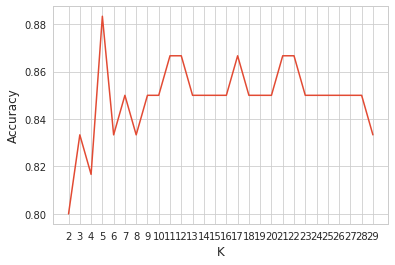

In [47]:
cross_val()

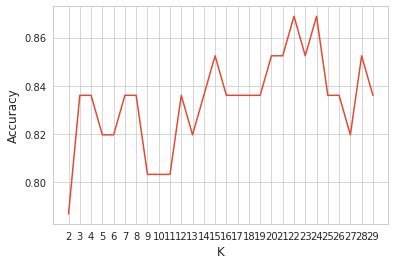

In [48]:
cross_val(xtest = Xtrain_3, xtrain = [Xtrain_1,Xtrain_2,Xtrain_4], ytest = ytrain_3, ytrain = [ytrain_1,ytrain_2,ytrain_4])

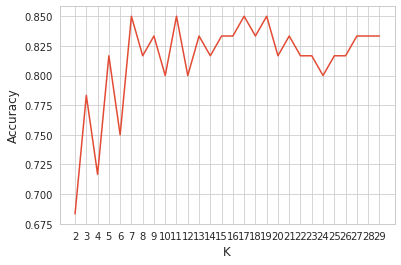

In [49]:
cross_val(xtest = Xtrain_2, xtrain = [Xtrain_1,Xtrain_3,Xtrain_4], ytest = ytrain_2, ytrain = [ytrain_1,ytrain_3,ytrain_4])

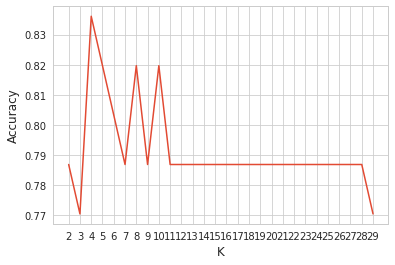

In [50]:
cross_val(xtest = Xtrain_1, xtrain = [Xtrain_2,Xtrain_3,Xtrain_4], ytest = ytrain_1, ytrain = [ytrain_2,ytrain_3,ytrain_4])

#### CV

k = 8

In [56]:
def cross_val(xtest = Xtrain_4, xtrain = [Xtrain_1,Xtrain_2,Xtrain_3], ytest = ytrain_4, ytrain = [ytrain_1,ytrain_2,ytrain_3]):
  Xtemp = np.concatenate(xtrain)
  ytemp = np.concatenate(ytrain)

  knn = KNeighborsClassifier(n_neighbors = 8)
  knn.fit(Xtemp, ytemp)
  y_pred = knn.predict(xtest)
  score = accuracy_score(ytest,y_pred)

  return score

In [57]:
a = cross_val()
score = [float(a)]
a = cross_val(xtest = Xtrain_3, xtrain = [Xtrain_1,Xtrain_2,Xtrain_4], ytest = ytrain_3, ytrain = [ytrain_1,ytrain_2,ytrain_4])
score.append(float(a))
a = cross_val(xtest = Xtrain_2, xtrain = [Xtrain_1,Xtrain_3,Xtrain_4], ytest = ytrain_2, ytrain = [ytrain_1,ytrain_3,ytrain_4])
score.append(float(a))
a = cross_val(xtest = Xtrain_1, xtrain = [Xtrain_2,Xtrain_3,Xtrain_4], ytest = ytrain_1, ytrain = [ytrain_2,ytrain_3,ytrain_4])
score.append(float(a))

print(np.mean(score))
score

0.8264344262295081


[0.8333333333333334, 0.8360655737704918, 0.8166666666666667, 0.819672131147541]

#### Evaluate test model

In [58]:
cross_val(xtest = Xtest, xtrain = [Xtrain_1,Xtrain_2,Xtrain_3,Xtrain_4], ytest = ytest, ytrain = [ytrain_1,ytrain_2,ytrain_3,ytrain_4])

0.8688524590163934

In [59]:
Xtemp = np.concatenate([Xtrain_1,Xtrain_2,Xtrain_3,Xtrain_4])
ytemp = np.concatenate([ytrain_1,ytrain_2,ytrain_3,ytrain_4])
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(Xtemp,ytemp)
y_pred = knn.predict(Xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        30
           1       0.90      0.84      0.87        31

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [60]:
knn_con = confusion_matrix(ytest,y_pred)

### SVM

#### Optimize parameters

In [61]:
Xtrain = np.concatenate([Xtrain_1,Xtrain_2,Xtrain_3,Xtrain_4])
ytrain = np.concatenate([ytrain_1,ytrain_2,ytrain_3,ytrain_4])

In [62]:
from sklearn.svm import SVC
svm = SVC()
from sklearn.pipeline import Pipeline
svm_est = Pipeline([('svc',SVC())])

from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2)

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10]
kernels = ['linear','rbf','poly','sigmoid']
degrees = [2,3,4,5]
param_grid = dict(svc__gamma=gammas, svc__C=Cs, svc__kernel = kernels, svc__degree = degrees)

from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(svm_est, param_grid=param_grid, cv=cv)
grid_cv.fit(Xtrain, ytrain)

print(grid_cv.best_params_)

{'svc__C': 0.1, 'svc__degree': 2, 'svc__gamma': 0.1, 'svc__kernel': 'sigmoid'}


degree is ignored since kernal is not poly

#### CV

In [68]:
def cross_val(xtest = Xtrain_4, xtrain = [Xtrain_1,Xtrain_2,Xtrain_3], ytest = ytrain_4, ytrain = [ytrain_1,ytrain_2,ytrain_3]):
  Xtemp = np.concatenate(xtrain)
  ytemp = np.concatenate(ytrain)

  svc = SVC(C = 0.1, gamma = 0.1,kernel = 'sigmoid')
  svc.fit(Xtemp, ytemp)
  y_pred = svc.predict(xtest)
  score = accuracy_score(ytest,y_pred)

  return score

In [69]:
a = cross_val()
score = [float(a)]
a = cross_val(xtest = Xtrain_3, xtrain = [Xtrain_1,Xtrain_2,Xtrain_4], ytest = ytrain_3, ytrain = [ytrain_1,ytrain_2,ytrain_4])
score.append(float(a))
a = cross_val(xtest = Xtrain_2, xtrain = [Xtrain_1,Xtrain_3,Xtrain_4], ytest = ytrain_2, ytrain = [ytrain_1,ytrain_3,ytrain_4])
score.append(float(a))
a = cross_val(xtest = Xtrain_1, xtrain = [Xtrain_2,Xtrain_3,Xtrain_4], ytest = ytrain_1, ytrain = [ytrain_2,ytrain_3,ytrain_4])
score.append(float(a))

print(np.mean(score))
score

0.8431693989071039


[0.8666666666666667, 0.819672131147541, 0.8666666666666667, 0.819672131147541]

#### Evaluate test model

In [73]:
cross_val(xtest = Xtest, xtrain = [Xtrain_1,Xtrain_2,Xtrain_3,Xtrain_4], ytest = ytest, ytrain = [ytrain_1,ytrain_2,ytrain_3,ytrain_4])

0.8524590163934426

In [75]:
svc = SVC(C = 0.1, gamma = 0.1,kernel = 'sigmoid')
svc.fit(Xtrain,ytrain)
y_pred = svc.predict(Xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.84      0.87      0.86        31

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [76]:
svm_con = confusion_matrix(ytest,y_pred)

### Naive Bayes

#### CV

In [77]:
from sklearn.naive_bayes import GaussianNB
def cross_val(xtest = Xtrain_4, xtrain = [Xtrain_1,Xtrain_2,Xtrain_3], ytest = ytrain_4, ytrain = [ytrain_1,ytrain_2,ytrain_3]):
  Xtemp = np.concatenate(xtrain)
  ytemp = np.concatenate(ytrain)

  GNB = GaussianNB()
  GNB.fit(Xtemp, ytemp)
  y_pred = GNB.predict(xtest)
  score = accuracy_score(ytest,y_pred)

  return score

In [78]:
a = cross_val()
score = [float(a)]
a = cross_val(xtest = Xtrain_3, xtrain = [Xtrain_1,Xtrain_2,Xtrain_4], ytest = ytrain_3, ytrain = [ytrain_1,ytrain_2,ytrain_4])
score.append(float(a))
a = cross_val(xtest = Xtrain_2, xtrain = [Xtrain_1,Xtrain_3,Xtrain_4], ytest = ytrain_2, ytrain = [ytrain_1,ytrain_3,ytrain_4])
score.append(float(a))
a = cross_val(xtest = Xtrain_1, xtrain = [Xtrain_2,Xtrain_3,Xtrain_4], ytest = ytrain_1, ytrain = [ytrain_2,ytrain_3,ytrain_4])
score.append(float(a))

print(np.mean(score))
score

0.7771857923497267


[0.8833333333333333, 0.8360655737704918, 0.75, 0.639344262295082]

#### Evaluate test model

In [79]:
cross_val(xtest = Xtest, xtrain = [Xtrain_1,Xtrain_2,Xtrain_3,Xtrain_4], ytest = ytest, ytrain = [ytrain_1,ytrain_2,ytrain_3,ytrain_4])

0.8688524590163934

In [80]:
GNB = GaussianNB()
GNB.fit(Xtrain,ytrain)
y_pred = GNB.predict(Xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        30
           1       0.90      0.84      0.87        31

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [81]:
nb_con = confusion_matrix(ytest,y_pred)

### Decision Tree

#### Optimize parameters

In [82]:
Xtrain = np.concatenate([Xtrain_1,Xtrain_2,Xtrain_3,Xtrain_4])
ytrain = np.concatenate([ytrain_1,ytrain_2,ytrain_3,ytrain_4])

In [83]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2)

crit = ['gini','entropy']
maxdep = [10,20,50]
minleaf = [5,10,15,30]
maxleaf = [10,50,100,300,500]

from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = {'criterion':crit, 'max_depth':maxdep, 'min_samples_leaf':minleaf, 'max_leaf_nodes':maxleaf}
gs_inst = GridSearchCV(dtc,param_grid=param_grid,cv=cv)
gs_inst.fit(Xtrain, ytrain)

print(gs_inst.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 5}


#### CV

In [84]:
def cross_val(xtest = Xtrain_4, xtrain = [Xtrain_1,Xtrain_2,Xtrain_3], ytest = ytrain_4, ytrain = [ytrain_1,ytrain_2,ytrain_3]):
  Xtemp = np.concatenate(xtrain)
  ytemp = np.concatenate(ytrain)
  
  dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, max_leaf_nodes = 10, min_samples_leaf = 5)
  dtc.fit(Xtemp, ytemp)
  y_pred = dtc.predict(xtest)
  score = accuracy_score(ytest,y_pred)

  return score

In [85]:
a = cross_val()
score = [float(a)]
a = cross_val(xtest = Xtrain_3, xtrain = [Xtrain_1,Xtrain_2,Xtrain_4], ytest = ytrain_3, ytrain = [ytrain_1,ytrain_2,ytrain_4])
score.append(float(a))
a = cross_val(xtest = Xtrain_2, xtrain = [Xtrain_1,Xtrain_3,Xtrain_4], ytest = ytrain_2, ytrain = [ytrain_1,ytrain_3,ytrain_4])
score.append(float(a))
a = cross_val(xtest = Xtrain_1, xtrain = [Xtrain_2,Xtrain_3,Xtrain_4], ytest = ytrain_1, ytrain = [ytrain_2,ytrain_3,ytrain_4])
score.append(float(a))

print(np.mean(score))
score

0.7772540983606558


[0.85, 0.7213114754098361, 0.8, 0.7377049180327869]

In [116]:
# Visualization
def cross_val(xtrain = [Xtrain_1,Xtrain_2,Xtrain_3], ytrain = [ytrain_1,ytrain_2,ytrain_3],col = X_columns):
  Xtemp = np.concatenate(xtrain)
  ytemp = np.concatenate(ytrain)
  
  dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 50, max_leaf_nodes = 10, min_samples_leaf = 5)
  dtc.fit(Xtemp, ytemp)
  
  from sklearn import tree
  plt.style.use('grayscale')
  fig = plt.figure(figsize=(12,8))
  _ = tree.plot_tree(dtc, feature_names=col,filled=True, class_names=['no disease','heart disease'])

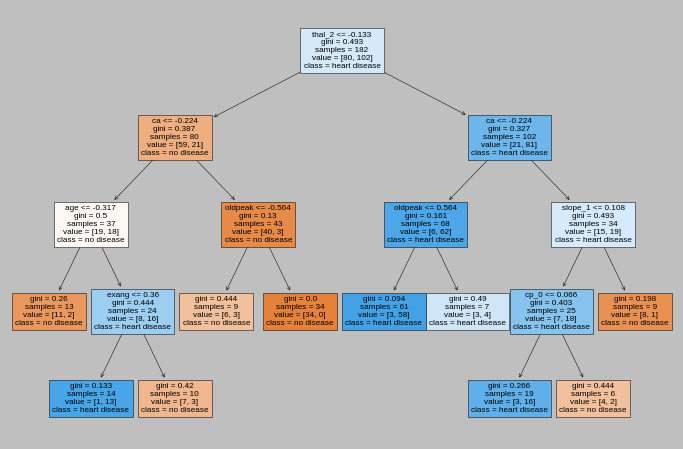

In [117]:
cross_val()

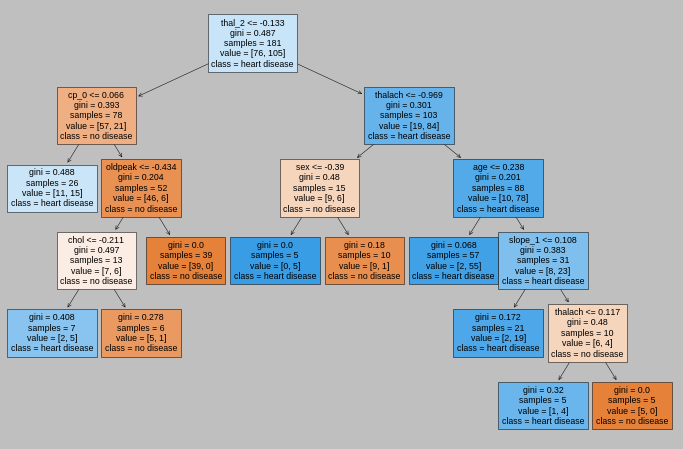

In [118]:
cross_val(xtrain = [Xtrain_1,Xtrain_2,Xtrain_4], ytrain = [ytrain_1,ytrain_2,ytrain_4],col = X_columns)

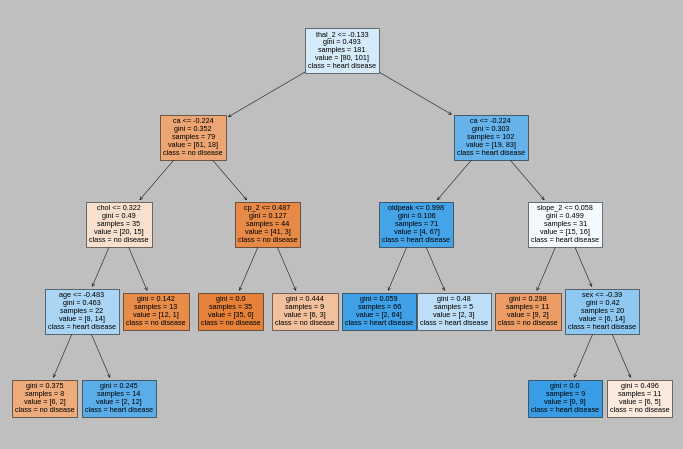

In [119]:
cross_val(xtrain = [Xtrain_4,Xtrain_2,Xtrain_3], ytrain = [ytrain_4,ytrain_2,ytrain_3],col = X_columns)

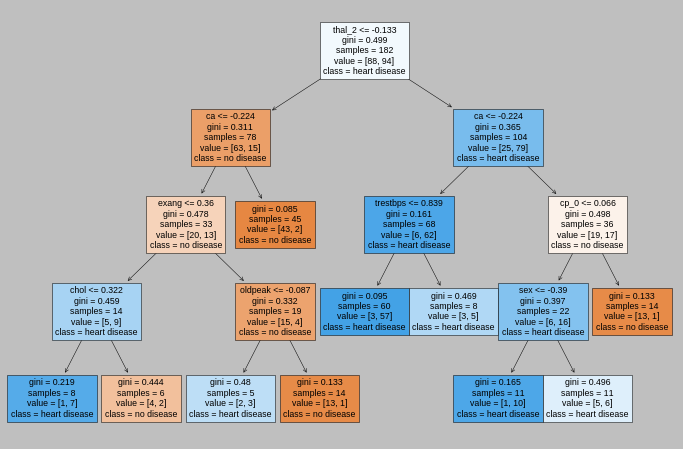

In [120]:
cross_val(xtrain = [Xtrain_1,Xtrain_4,Xtrain_3], ytrain = [ytrain_1,ytrain_4,ytrain_3],col = X_columns)

#### Evaluate test model

In [121]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 50, max_leaf_nodes = 10, min_samples_leaf = 5)
dtc.fit(Xtrain, ytrain)
y_pred = dtc.predict(Xtest)
accuracy_score(ytest,y_pred)

0.8032786885245902

In [122]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        30
           1       0.81      0.81      0.81        31

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [123]:
dt_con = confusion_matrix(ytest,y_pred)

### Random Forest

#### Optimize parameter 

In [126]:
from sklearn.ensemble import RandomForestClassifier
rft = RandomForestClassifier()

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2)

ne = [50,100]
c = ['gini', 'entropy']
max_depth = [100,200,400]
min_samples_leaf = [1,10]

param_grid = {'n_estimators': ne, 'max_depth': max_depth,'min_samples_leaf': min_samples_leaf, 'criterion' : c}
gs_inst = GridSearchCV(rft, param_grid= param_grid, cv =cv)
gs_inst.fit(Xtrain, ytrain)

print(gs_inst.best_params_)

{'criterion': 'entropy', 'max_depth': 400, 'min_samples_leaf': 10, 'n_estimators': 50}


#### CV

In [127]:
def cross_val(xtest = Xtrain_4, xtrain = [Xtrain_1,Xtrain_2,Xtrain_3], ytest = ytrain_4, ytrain = [ytrain_1,ytrain_2,ytrain_3]):
  Xtemp = np.concatenate(xtrain)
  ytemp = np.concatenate(ytrain)
  
  rft = RandomForestClassifier(criterion = 'entropy',max_depth = 400, min_samples_leaf = 10, n_estimators= 50)
  rft.fit(Xtemp, ytemp)
  y_pred = rft.predict(xtest)
  score = accuracy_score(ytest,y_pred)

  return score

In [128]:
a = cross_val()
score = [float(a)]
a = cross_val(xtest = Xtrain_3, xtrain = [Xtrain_1,Xtrain_2,Xtrain_4], ytest = ytrain_3, ytrain = [ytrain_1,ytrain_2,ytrain_4])
score.append(float(a))
a = cross_val(xtest = Xtrain_2, xtrain = [Xtrain_1,Xtrain_3,Xtrain_4], ytest = ytrain_2, ytrain = [ytrain_1,ytrain_3,ytrain_4])
score.append(float(a))
a = cross_val(xtest = Xtrain_1, xtrain = [Xtrain_2,Xtrain_3,Xtrain_4], ytest = ytrain_1, ytrain = [ytrain_2,ytrain_3,ytrain_4])
score.append(float(a))

print(np.mean(score))
score

0.8347677595628415


[0.8666666666666667,
 0.8688524590163934,
 0.8166666666666667,
 0.7868852459016393]

#### Evaluate test model

In [133]:
rft = RandomForestClassifier(criterion = 'entropy',max_depth = 400, min_samples_leaf = 10, n_estimators= 50)
rft.fit(Xtrain, ytrain)
y_pred = rft.predict(Xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.85      0.94      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [136]:
cross_val(xtest = Xtest, xtrain = [Xtrain_1,Xtrain_2,Xtrain_3,Xtrain_4], ytest = ytest, ytrain = [ytrain_1,ytrain_2,ytrain_3,ytrain_4])

0.8852459016393442

In [137]:
rf_con = confusion_matrix(ytest,y_pred)

### LDA

#### CV

In [138]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def cross_val(xtest = Xtrain_4, xtrain = [Xtrain_1,Xtrain_2,Xtrain_3], ytest = ytrain_4, ytrain = [ytrain_1,ytrain_2,ytrain_3]):
  Xtemp = np.concatenate(xtrain)
  ytemp = np.concatenate(ytrain)

  lda = LDA()
  lda.fit(Xtemp, ytemp)
  y_pred = lda.predict(xtest)
  score = accuracy_score(ytest,y_pred)

  return score

In [143]:
a = cross_val()
score = [float(a)]
a = cross_val(xtest = Xtrain_3, xtrain = [Xtrain_1,Xtrain_2,Xtrain_4], ytest = ytrain_3, ytrain = [ytrain_1,ytrain_2,ytrain_4])
score.append(float(a))
a = cross_val(xtest = Xtrain_2, xtrain = [Xtrain_1,Xtrain_3,Xtrain_4], ytest = ytrain_2, ytrain = [ytrain_1,ytrain_3,ytrain_4])
score.append(float(a))
a = cross_val(xtest = Xtrain_1, xtrain = [Xtrain_2,Xtrain_3,Xtrain_4], ytest = ytrain_1, ytrain = [ytrain_2,ytrain_3,ytrain_4])
score.append(float(a))

print(np.mean(score))
score

0.8266393442622951


[0.8666666666666667, 0.819672131147541, 0.8333333333333334, 0.7868852459016393]

#### Evaluate test model

In [140]:
cross_val(xtest = Xtest, xtrain = [Xtrain_1,Xtrain_2,Xtrain_3,Xtrain_4], ytest = ytest, ytrain = [ytrain_1,ytrain_2,ytrain_3,ytrain_4])

0.8524590163934426

In [141]:
lda = LDA()
lda.fit(Xtrain, ytrain)
y_pred = lda.predict(Xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.84      0.87      0.86        31

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [142]:
lda_con = confusion_matrix(ytest,y_pred)

### Neural Network

In [144]:
Xtrain.shape

(242, 21)

In [145]:
model = Sequential()
model.add(Dense(21,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(5,activation = 'relu'))
model.add(Dropout(0.25)) 
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop',metrics=['accuracy'])

earstop = EarlyStopping(monitor = 'val_loss', mode ='min', verbose = 1, patience = 10)
model.fit(x = Xtrain, y = ytrain, epochs = 200, validation_data=(Xtest,ytest), callbacks = [earstop])

Epoch 1/200
8/8 [==============================] - 1s 40ms/step - loss: 0.8490 - accuracy: 0.4517 - val_loss: 0.6964 - val_accuracy: 0.5082
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 0.7687 - accuracy: 0.5375 - val_loss: 0.6626 - val_accuracy: 0.6393
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 0.7156 - accuracy: 0.4832 - val_loss: 0.6378 - val_accuracy: 0.6721
Epoch 4/200
8/8 [==============================] - 0s 9ms/step - loss: 0.7003 - accuracy: 0.5260 - val_loss: 0.6253 - val_accuracy: 0.6721
Epoch 5/200
8/8 [==============================] - 0s 9ms/step - loss: 0.6444 - accuracy: 0.5616 - val_loss: 0.6144 - val_accuracy: 0.7049
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6154 - accuracy: 0.6596 - val_loss: 0.6043 - val_accuracy: 0.7213
Epoch 7/200
8/8 [==============================] - 0s 10ms/step - loss: 0.6743 - accuracy: 0.6023 - val_loss: 0.5925 - val_accuracy: 0.7377
Epoch 8/200
8/8 [========

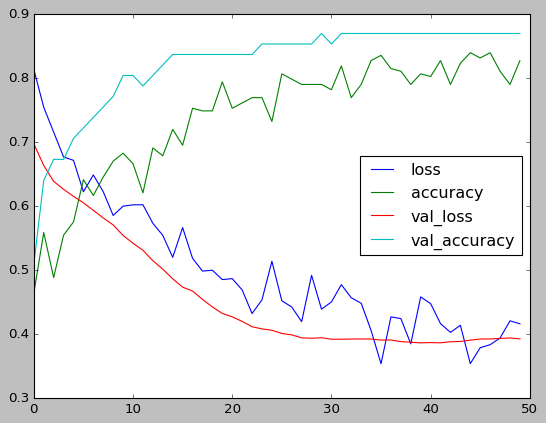

In [153]:
plt.style.use('classic')
loss = pd.DataFrame(model.history.history)
loss.plot()

In [154]:
y_pred = model.predict_classes(Xtest)
print(accuracy_score(ytest,y_pred))
print(classification_report(ytest,y_pred))

0.8688524590163934
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.87      0.87      0.87        31

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [155]:
neural_net_con = confusion_matrix(ytest,y_pred)

## Conclusion

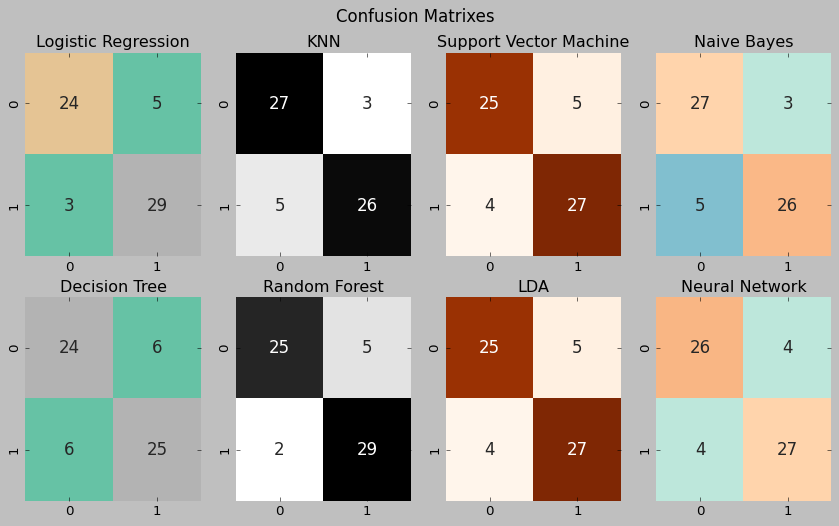

In [173]:
plt.style.use('fast')
plt.figure(figsize=(13,7))

plt.suptitle("Confusion Matrixes",fontsize=15)
plt.subplots_adjust(wspace = 0.2, hspace= 0.2)

plt.subplot(2,4,1)
plt.title("Logistic Regression")
sns.heatmap(log_con,annot=True,cmap="Set2",fmt="d",cbar=False, annot_kws={"size": 15})

plt.subplot(2,4,2)
plt.title("KNN")
sns.heatmap(knn_con,annot=True,cmap="binary",fmt="d",cbar=False, annot_kws={"size": 15})

plt.subplot(2,4,3)
plt.title("Support Vector Machine")
sns.heatmap(svm_con,annot=True,cmap="Oranges",fmt="d",cbar=False, annot_kws={"size": 15})

plt.subplot(2,4,4)
plt.title("Naive Bayes")
sns.heatmap(nb_con,annot=True,cmap="icefire",fmt="d",cbar=False, annot_kws={"size": 15})

plt.subplot(2,4,5)
plt.title("Decision Tree")
sns.heatmap(dt_con,annot=True,cmap="Set2",fmt="d",cbar=False, annot_kws={"size": 15})

plt.subplot(2,4,6)
plt.title("Random Forest")
sns.heatmap(rf_con,annot=True,cmap="binary",fmt="d",cbar=False, annot_kws={"size": 15})

plt.subplot(2,4,7)
plt.title("LDA")
sns.heatmap(lda_con,annot=True,cmap="Oranges",fmt="d",cbar=False, annot_kws={"size": 15})

plt.subplot(2,4,8)
plt.title("Neural Network")
sns.heatmap(neural_net_con,annot=True,cmap="icefire",fmt="d", cbar=False, annot_kws={"size": 15})

plt.show()